This code installs the necessary packages, imports the required libraries, and then performs a time-series forecasting using the 'Prophet' package by Facebook. Here's a step-by-step explanation of the code:

1) Install the required packages: pystan, numpy, pandas, build-essential, libatlas-base-dev, libboost-all-dev, and prophet (fbprophet).

2) Import pandas and the Prophet class from the prophet library.

3) Load the sales data from a CSV file and convert the 'Date' column to a datetime datatype.

4) Create a new dataframe to obtain total sales per day and resample the data to daily frequency.

5) Format the data for the Prophet library by renaming the columns to 'ds' and 'y'.

6) Create an instance of the Prophet class and fit the model with the sales data.

7) Make a future dataframe for the next 30 days, which will be used to forecast sales.

8) Predict the sales for the future dataframe using the model.

9) Plot the forecast and its components.

10) Display the last 32 rows of the forecast dataframe, which includes the predicted sales (yhat), lower and upper confidence intervals (yhat_lower and yhat_upper), and the date (ds).

This code will provide a forecast of daily total sales for the next 30 days based on the historical sales data provided.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libatlas-base-dev is already the newest version (3.10.3-8ubuntu7).
libboost-all-dev is already the newest version (1.71.0.0ubuntu2).
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpykyokxuq/ap26dkn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpykyokxuq/6o4lhqgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38490', 'data', 'file=/tmp/tmpykyokxuq/ap26dkn5.json', 'init=/tmp/tmpykyokxuq/6o4lhqgn.json', 'output', 'file=/tmp/tmpykyokxuq/prophet_modeljmdbhna1/prophet_model-20230410135703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


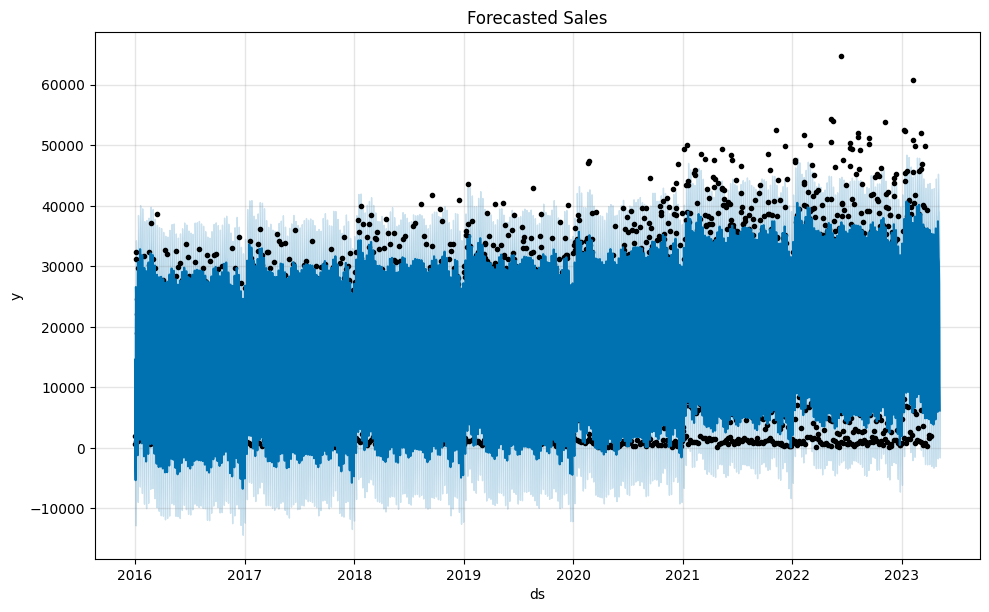

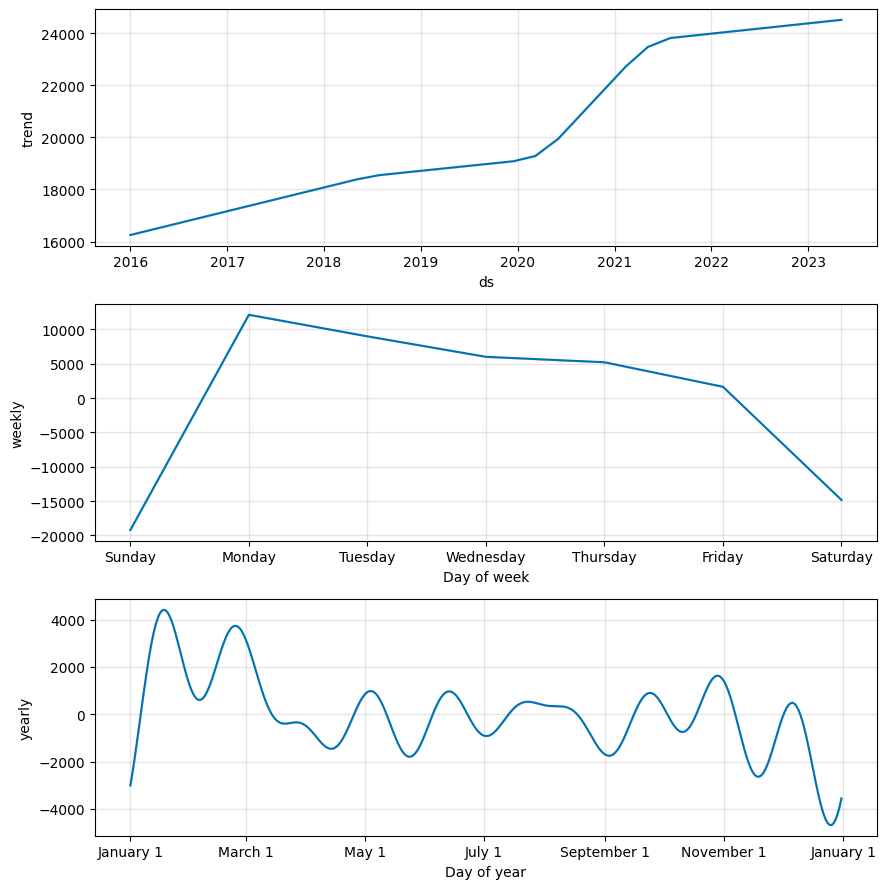

             ds          yhat    yhat_lower    yhat_upper
2652 2023-04-06  28815.049206  21754.540411  36236.278799
2653 2023-04-07  25143.150342  17674.505929  33312.388965
2654 2023-04-08   8556.650800    704.248500  15835.045532
2655 2023-04-09   4082.183034  -2985.829781  11732.037816
2656 2023-04-10  35352.735547  27871.329326  42793.210608
2657 2023-04-11  32138.855538  24717.721306  39389.224040
2658 2023-04-12  29096.169504  21461.145073  36372.477916
2659 2023-04-13  28267.557006  20922.795278  36366.201006
2660 2023-04-14  24678.863551  17090.285663  32266.967167
2661 2023-04-15   8197.379868    810.909353  15668.120904
2662 2023-04-16   3847.427518  -3256.725876  11465.850057
2663 2023-04-17  35258.942527  27126.960061  42893.036637
2664 2023-04-18  32198.769570  24073.545109  39781.789146
2665 2023-04-19  29318.295242  21969.189599  36632.961000
2666 2023-04-20  28655.752123  20811.589545  36046.955017
2667 2023-04-21  25232.075566  17655.880653  33024.447704
2668 2023-04-2

In [6]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

def install_packages():
    !pip install pystan
    !apt-get install -y build-essential libatlas-base-dev libboost-all-dev
    !pip install prophet

def load_and_prepare_data(file_path):
    # Load data and convert Date column to datetime datatype
    sales = pd.read_csv(file_path)
    sales['Date'] = pd.to_datetime(sales['Date'])

    # Create a new dataframe to obtain total sales per day
    sales.index = sales['Date']
    sales.drop(columns='Date')
    sales.index = sales['Date']
    sales_data = sales.loc[:,['Total','Date']]
    sales_data = sales_data.drop(columns='Date').resample('D').sum()

    # Format the data for Prophet
    sales_data = sales_data.reset_index()
    sales_data.columns = ['ds', 'y']

    return sales_data

def build_and_train_prophet_model(sales_data):
    model = Prophet()
    model.fit(sales_data)
    return model

def make_forecast(model, days_to_forecast):
    future = model.make_future_dataframe(periods=days_to_forecast)
    forecast = model.predict(future)
    return forecast

def plot_forecast(model, forecast):
    fig = model.plot(forecast)
    plt.title("Forecasted Sales")
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.show()

def display_forecast_results(forecast, last_n_days=32):
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(last_n_days))

def main():
    install_packages()
    
    # Provide the path to your CSV file
    file_path = 'all_sales_2016_mar_2023.csv'
    sales_data = load_and_prepare_data(file_path)

    model = build_and_train_prophet_model(sales_data)

    days_to_forecast = 30
    forecast = make_forecast(model, days_to_forecast)

    plot_forecast(model, forecast)
    display_forecast_results(forecast)

if __name__ == "__main__":
    main()